In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import seaborn as seabornInstance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from scipy.interpolate import CubicSpline
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [5]:
dataset = pd.read_csv("co2emission.csv")
dataset

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [6]:
new_data = dataset[["country", "year", "co2_per_capita"]]
new_data.head()

,country,year,co2_per_capita
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN


In [7]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [10]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [11]:
grouped = europe_data.groupby(['country'])
mean_values = grouped.mean()
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [12]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

# Display the first 10 means per year
mean_by_year.head(10)


year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [13]:
# Convert Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df

,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [14]:
# Convert 'year' column to datetime format without considering it as a timestamp
df['year'] = pd.to_datetime(df['year'], format='%Y')

print(df)
print(df.dtypes)

          year  co2_per_capita
0   1900-01-01        2.395832
1   1901-01-01        2.375619
2   1902-01-01        2.365278
3   1903-01-01        2.400300
4   1904-01-01        2.419300
..         ...             ...
117 2017-01-01        6.501851
118 2018-01-01        6.448809
119 2019-01-01        6.175596
120 2020-01-01        5.677936
121 2021-01-01        5.756660

[122 rows x 2 columns]
year              datetime64[ns]
co2_per_capita           float64
dtype: object


In [26]:
X = df[['year']]
y = df['co2_per_capita']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.75)

In [28]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [29]:
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=0)

In [30]:
reg.predict(X_test[0:10])

array([7.65310587, 7.65310587, 2.68690095, 7.65310587, 2.68690095,
       2.68690095, 2.68690095, 2.68690095, 7.65310587, 7.65310587])

In [31]:
X_test.head(1)

,year
84,1984-01-01


In [32]:
# predict 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

array([7.65310587])

In [18]:
from pmdarima import auto_arima

In [19]:
df

,year,co2_per_capita
0,1900-01-01,1.527100
1,1901-01-01,1.503350
2,1902-01-01,1.491200
3,1903-01-01,1.532350
4,1904-01-01,1.554675
...,...,...
117,2017-01-01,6.501851
118,2018-01-01,6.448809
119,2019-01-01,6.175596
120,2020-01-01,5.677936


In [20]:
stepwise_fit = auto_arima(df.co2_per_capita, trace = True,
                         suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-26.760, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15.439, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-29.197, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-25.986, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14.509, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-28.275, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29.061, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-28.769, Time=0.60 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-29.795, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-29.178, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-30.405, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-25.985, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-30.579, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-28.581, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-28.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  122
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  19.289
Date:                Tue, 07 May 2024   AIC                            -30.579
Time:                        10:04:04   BIC                            -19.395
Sample:                             0   HQIC                           -26.037
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1551      0.146      7.931      0.000       0.870       1.441
ar.L2         -0.1962      0.105     -1.868      0.062      -0.402       0.010
ma.L1         -0.8664      0.121     -7.132      0.000      -1.105      -0.628
sigma2         0.0425      0.005      9.212      0.000       0.033       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.66
Prob(Q):                              0.99   Prob(JB):                         0.06
Heteroskedasticity (H):               2.66   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

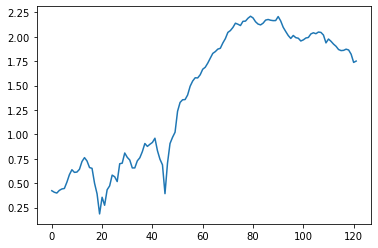

In [21]:
df = np.log(df.co2_per_capita)
df.plot();

In [22]:
print(df.shape)
df_train = df.iloc[:-30]
df_test = df.iloc[-30:]
print(df_train.shape, df_test.shape)

(122,)
(92,) (30,)


In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(df_train, order = (2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                   92
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 100.007
Date:                Tue, 07 May 2024   AIC                           -192.015
Time:                        10:06:42   BIC                           -181.972
Sample:                             0   HQIC                          -187.963
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1048      0.564     -0.186      0.853      -1.210       1.000
ar.L2          0.1994      0.123      1.623      0.105      -0.041       0.440
ma.L1          0.2162      0.584      0.370      0.7

In [26]:
#Make predctions on test set
start = len(df_train)
end = len(df_train) + len(df_test)-1
pred = model_fit.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end+1]
print(pred)

92     2.163165
93     2.153981
94     2.155369
95     2.153392
96     2.153877
97     2.153432
98     2.153575
99     2.153471
100    2.153510
101    2.153486
102    2.153496
103    2.153490
104    2.153493
105    2.153491
106    2.153492
107    2.153492
108    2.153492
109    2.153492
110    2.153492
111    2.153492
112    2.153492
113    2.153492
114    2.153492
115    2.153492
116    2.153492
117    2.153492
118    2.153492
119    2.153492
120    2.153492
121    2.153492
Name: predicted_mean, dtype: float64


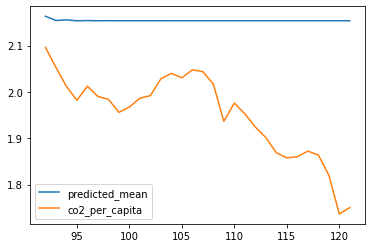

In [28]:
pred.plot(legend = True)
df_test.plot(legend = True);

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            122 non-null    datetime64[ns]
 1   co2_per_capita  122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

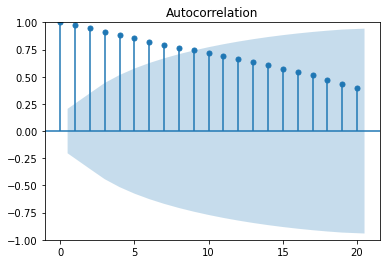

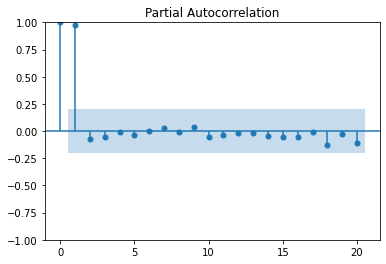

In [30]:
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
adftest = adfuller(df_train)
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -0.31441365582596886
P-Value: 0.9234379741855306
Number of lags: 0
Number of observations: 91
Critical Values: {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


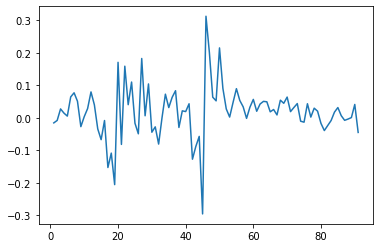

In [33]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot();

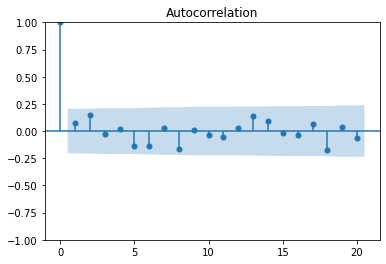

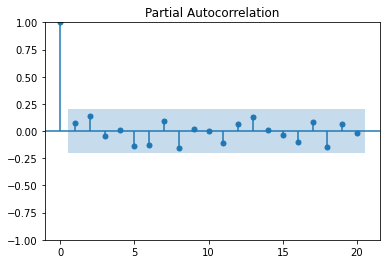

In [34]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [35]:
adftest = adfuller(df_train_diff)
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -8.663502381790371
P-Value: 4.7522750589381685e-14
Number of lags: 0
Number of observations: 90
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [36]:
model = ARIMA(df_train, order = (2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                   92
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  99.981
Date:                Tue, 07 May 2024   AIC                           -193.962
Time:                        10:08:29   BIC                           -186.430
Sample:                             0   HQIC                          -190.923
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.053      1.983      0.047       0.001       0.207
ar.L2          0.1752      0.075      2.328      0.020       0.028       0.323
sigma2         0.0065      0.001     11.001      0.0

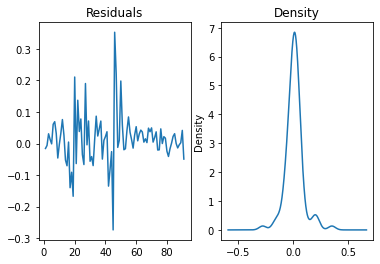

In [37]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plt.show()

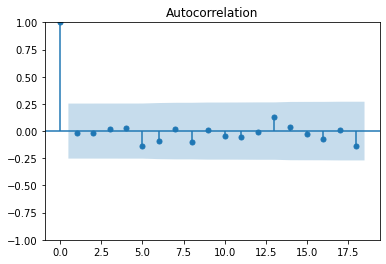

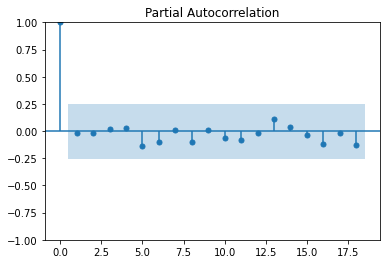

In [22]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

forecast_test = model_fit.forecast(len(df_test))
#df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df['forecast_manual'] = pd.to_numeric(df['forecast_manual'], errors = 'coerce')
df.plot()

<AxesSubplot:>

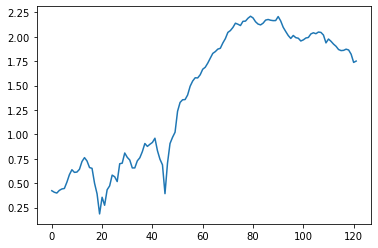

In [38]:
df.plot()